In [3]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor

In [30]:
## COMPUTING THE NEAREST NEIGHBOR BASELINE

import os
import pandas as pd
import sys
import os
from subprocess import call

#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
import numpy as np

import random
from scipy.stats import ttest_1samp
from sklearn.externals import joblib
from matplotlib.lines import Line2D

from sklearn.ensemble import RandomForestRegressor

random.seed(42)
np.random.seed(42)

from scipy.stats import spearmanr, pearsonr
from sklearn.externals import joblib

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import sys
sys.path.append('./UniRep-analysis/')

import common_v2.validation_tools
import scipy.stats

test_seqs = {}
train_seqs = {}
run_type = 'test'

from common_v2.validation_tools import reps, subsets

dataset_filetype = 'loaded_full_dataset'
path = pd.read_pickle(f"../data/pieces_new/rocklin_ssm2__full.pkl")

for s in subsets['rocklin_ssm2']:

    rep='sequence'
    train, validate, test = common_v2.validation_tools.get_tvt(path,
                                                             'rocklin_ssm2',
                                                             s,
                                                             rep, 
                                       dataset_filetype=dataset_filetype, 
                                       verbose=False,

                                                                modifiers=[common_v2.validation_tools.tvt_modifier_baseline_reps,
                                                                        common_v2.validation_tools.tvt_modifier_return_mean]
                            )

    if run_type == 'test':
        validate = test
        
        
    test_seqs[s]= validate
    train_seqs[s]=train

df=pd.read_csv('./ssm2_stability_scores',delim_whitespace=True)

wildtypes = df[df.pos == 0].set_index('name')[['consensus_stability_score', 'sequence']]


aas='ADEFGHIKLMNPQRSTVWY'

aa_diff_for_each_wildtype = {}

for wt in wildtypes.index:
    
    aa_diff={}

    for i, aa1 in enumerate(aas[:-1]):
        for j, aa2 in enumerate(aas[i+1:]):
            aa_diff[(aa1, aa2)] = []
    
    print (wt)
    subdf=df[(df['my_wt'] == wt) & (df.sequence.map(lambda x: x in train_seqs[wt + '_ssm2_stability'].rep.tolist()))]
    print(subdf.shape)
    
    wtss = wildtypes.loc[wt, 'consensus_stability_score']
    
    for pos in list(set([x for x in subdf['pos'] if x != 0])):
        subdf2=subdf.query('pos == %s' % pos)
        for mut, wt_aa, ss in zip(subdf2['mut'], subdf2['wt_aa'], subdf2['consensus_stability_score']):
            aa_diff[tuple(sorted([mut, wt_aa]))].append(abs(wtss - ss))
        for mut1, ss1 in zip(subdf2['mut'], subdf2['consensus_stability_score']):
            for mut2, ss2 in zip(subdf2['mut'], subdf2['consensus_stability_score']):
                if mut1 < mut2:
                    aa_diff[tuple(sorted([mut1, mut2]))].append(abs(ss1 - ss2))
                    
    aagrid=np.zeros((19,19))
    for i, aa1 in enumerate(aas):
        for j, aa2 in enumerate(aas):
            if i != j: aagrid[i,j] = np.average(aa_diff[tuple(sorted([aa1, aa2]))])
        
                    
    aa_diff_for_each_wildtype[wt] = aagrid

wildtypes['pearson_nn'] = 0
for wt in wildtypes.index:

    train = df[df.sequence.map(lambda x: x in train_seqs[wt+ '_ssm2_stability'].rep.tolist())]
    test = df[df.sequence.map(lambda x: x in test_seqs[wt+ '_ssm2_stability'].rep.tolist())]

    aagrid = aa_diff_for_each_wildtype[wt]

    out = []
    for pos, wt_aa, mut, ss in zip(test['pos'], test['wt_aa'], test['mut'], test['consensus_stability_score']):
        #print(aas, mut)
        #print(aas.index(mut))
        
        if mut == 'na':
            out.append((pos, mut, newaa, ss, wildtypes.loc[wt,'consensus_stability_score']))
        else:
            for newaa in (np.array([x for x in aas])[np.argsort(aagrid[aas.index(mut)])[1:]]):

                nndf=train.query('pos == %s & mut == "%s"' % (pos, newaa))
                if len(nndf) == 1:
                    out.append((pos, mut, newaa, ss, nndf['consensus_stability_score'].values[-1]))
                    break
    out=pd.DataFrame(out)
    out.columns=['pos','mut','nnaa','consensus_stability_score','nn_consensus_stability_score']
    
    wildtypes.loc[wt,'pearson_nn'] = scipy.stats.pearsonr(test_seqs[wt+'_ssm2_stability'].target, out.nn_consensus_stability_score)[0]

EEHEE_rd3_0037.pdb
(614, 28)
EEHEE_rd3_1498.pdb
(617, 28)
EEHEE_rd3_1702.pdb
(622, 28)
EEHEE_rd3_1716.pdb
(624, 28)
EHEE_0882.pdb
(579, 28)
EHEE_rd2_0005.pdb
(589, 28)
EHEE_rd3_0015.pdb
(570, 28)
HEEH_rd2_0779.pdb
(615, 28)
HEEH_rd3_0223.pdb
(621, 28)
HEEH_rd3_0726.pdb
(623, 28)
HEEH_rd3_0872.pdb
(633, 28)
HHH_0142.pdb
(633, 28)
HHH_rd2_0134.pdb
(630, 28)
HHH_rd3_0138.pdb
(610, 28)
Pin1
(563, 28)
hYAP65
(648, 28)
villin
(517, 28)


In [2]:
import os
import pandas as pd
import sys
import os
from subprocess import call

#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
import numpy as np

import random
from scipy.stats import ttest_1samp
from sklearn.externals import joblib
from matplotlib.lines import Line2D

from sklearn.ensemble import RandomForestRegressor

random.seed(42)
np.random.seed(42)

from scipy.stats import spearmanr, pearsonr
from sklearn.externals import joblib

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

import sys
sys.path.append('../')

import common_v2.validation_tools

from common_v2.validation_tools import reps, subsets

dataset_filetype = 'loaded_full_dataset'
path = pd.read_pickle(f"../data/pieces_new/rocklin_ssm2__full.pkl")

a very simple model where the effect of a mutation in the test set is predicted to be the average of all the effects of mutations at that position in the training set.

In [31]:
def id_mutations(wt, mut_seq):
    # identify mutations in same length wt and seq2
    n_mut = 0
    for i,letter in enumerate(list(mut_seq)):
        if letter != wt[i]:
            n_mut+=1
    return n_mut

def return_mutation_position(wt, mut_seq):
    # identify mutations in same length wt and seq2
    muts = []
    for i,letter in enumerate(list(mut_seq)):
        if letter != wt[i]:
            return i
    raise

In [32]:
from common_v2.validation_tools import metrics

In [33]:
run_type = 'test'

In [34]:
class simple_baseline_mutation_effect_model:
    def train(self, train, wt_seq, length):
        
        train["mutated_position"] = train.rep.map(lambda mut_seq: return_mutation_position(wt_seq, mut_seq))
        
        train.target = np.float16(train.target)
        
        avg_effects = train.groupby(['mutated_position']).target.mean()
        
        if len(avg_effects) != len(wt_seq):
            print("not all positions mutated in training data")
            
        self.avg_effects = avg_effects
        
    def predict(self, validate):
        
        return validate.rep.map(lambda mut_seq: self.avg_effects[return_mutation_position(wt_seq, mut_seq)]).values

In [35]:
subset_results = {}

for s in subsets['rocklin_ssm2']:

    rep='sequence'
    train, validate, test = common_v2.validation_tools.get_tvt(path,
                                                             'rocklin_ssm2',
                                                             s,
                                                             rep, 
                                       dataset_filetype=dataset_filetype, 
                                       verbose=False,

                                                                modifiers=[common_v2.validation_tools.tvt_modifier_baseline_reps,
                                                                        common_v2.validation_tools.tvt_modifier_return_mean]
                            )

    if run_type == 'test':
        validate = test
    
    print(s)
   
    length = train.rep.map(len).value_counts().index[0]
    wt_seq = "".join([train.rep.map(lambda x: x[i]).value_counts().index[0] for i in range(length)])
    
    print(length)
    
    model = simple_baseline_mutation_effect_model()
    
    train = train[train.rep != wt_seq]
    validate = validate[validate.rep != wt_seq]

    model.train(train, wt_seq, length)

    predictions = model.predict(validate)
    print(len(predictions), len(validate))
    
    
    results = pd.Series()

    for metric_name in metrics.keys():
        #print(validate['target'].values)
        #print(predictions)
        results.loc[metric_name] = metrics[metric_name](validate['target'],
                   predictions)
    
    our_results  = pd.read_csv(f"../data/results/rocklin_ssm2__{s}__all_1900__{run_type}__regression_results.csv", header=None, index_col=0)
    
    subset_results[s] = {"avg_pos_effect":results['pearson_r'], "UniRep":our_results.loc['pearson_r'].values[0]}

EEHEE_rd3_0037.pdb_ssm2_stability
43
85 85
EEHEE_rd3_1498.pdb_ssm2_stability
43
79 79
EEHEE_rd3_1702.pdb_ssm2_stability
43
78 78
EEHEE_rd3_1716.pdb_ssm2_stability
43
70 70
EHEE_0882.pdb_ssm2_stability
43
not all positions mutated in training data
61 61
EHEE_rd2_0005.pdb_ssm2_stability
43
not all positions mutated in training data
66 66
EHEE_rd3_0015.pdb_ssm2_stability
43
not all positions mutated in training data
72 72
HEEH_rd2_0779.pdb_ssm2_stability
43
77 77
HEEH_rd3_0223.pdb_ssm2_stability
43
79 79
HEEH_rd3_0726.pdb_ssm2_stability
43
67 67
HEEH_rd3_0872.pdb_ssm2_stability
43
77 77
HHH_0142.pdb_ssm2_stability
43
74 74
HHH_rd2_0134.pdb_ssm2_stability
43
79 79
HHH_rd3_0138.pdb_ssm2_stability
43
79 79
Pin1_ssm2_stability
43
not all positions mutated in training data
64 64
hYAP65_ssm2_stability
46
90 90
villin_ssm2_stability
43
not all positions mutated in training data
62 62


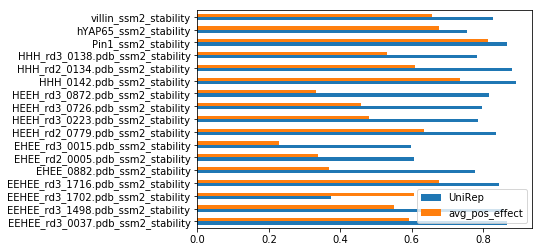

In [36]:
df = pd.DataFrame(subset_results)
df.T.plot(kind='barh')

# KNN

In [37]:
knn_results = {}

for s in subsets['rocklin_ssm2']:

    rep='all_1900'
    train, validate, test = common_v2.validation_tools.get_tvt(path,
                                                             'rocklin_ssm2',
                                                             s,
                                                             rep, 
                                                             dataset_filetype=dataset_filetype, 
                                                             verbose=False,
                                                             modifiers=[common_v2.validation_tools.tvt_modifier_baseline_reps,
                                                                        common_v2.validation_tools.tvt_modifier_return_mean]
                            )

    if run_type == 'test':
        validate = test
    
    print(s)

    model = KNeighborsRegressor(n_neighbors=10, metric='euclidean', weights='distance')

    #
    y_train = train.target.values.tolist()

    model.fit(
        np.asarray(train.rep.values.tolist()), 
        y_train)
    
    try:
        print(model.best_params_)
    except:
        pass

    predictions = model.predict(np.asarray(validate.rep.values.tolist()))

    results = pd.Series()

    for metric_name in metrics.keys():
        #print(validate['target'].values)
        #print(predictions)
        results.loc[metric_name] = metrics[metric_name](validate['target'],
                   predictions)
    
    
    knn_results[s] = results['pearson_r']

EEHEE_rd3_0037.pdb_ssm2_stability
EEHEE_rd3_1498.pdb_ssm2_stability
EEHEE_rd3_1702.pdb_ssm2_stability
EEHEE_rd3_1716.pdb_ssm2_stability
EHEE_0882.pdb_ssm2_stability
EHEE_rd2_0005.pdb_ssm2_stability
EHEE_rd3_0015.pdb_ssm2_stability
HEEH_rd2_0779.pdb_ssm2_stability
HEEH_rd3_0223.pdb_ssm2_stability
HEEH_rd3_0726.pdb_ssm2_stability
HEEH_rd3_0872.pdb_ssm2_stability
HHH_0142.pdb_ssm2_stability
HHH_rd2_0134.pdb_ssm2_stability
HHH_rd3_0138.pdb_ssm2_stability
Pin1_ssm2_stability
hYAP65_ssm2_stability
villin_ssm2_stability


In [38]:
for k in subset_results.keys():
    subset_results[k]['KNN'] = knn_results[k]

In [39]:
df = pd.DataFrame(subset_results)

In [40]:
df

,EEHEE_rd3_0037.pdb_ssm2_stability,EEHEE_rd3_1498.pdb_ssm2_stability,EEHEE_rd3_1702.pdb_ssm2_stability,EEHEE_rd3_1716.pdb_ssm2_stability,EHEE_0882.pdb_ssm2_stability,EHEE_rd2_0005.pdb_ssm2_stability,EHEE_rd3_0015.pdb_ssm2_stability,HEEH_rd2_0779.pdb_ssm2_stability,HEEH_rd3_0223.pdb_ssm2_stability,HEEH_rd3_0726.pdb_ssm2_stability,HEEH_rd3_0872.pdb_ssm2_stability,HHH_0142.pdb_ssm2_stability,HHH_rd2_0134.pdb_ssm2_stability,HHH_rd3_0138.pdb_ssm2_stability,Pin1_ssm2_stability,hYAP65_ssm2_stability,villin_ssm2_stability
KNN,0.826683,0.844763,0.748730,0.847634,0.690851,0.389385,0.539556,0.778639,0.762164,0.689174,0.778090,0.845037,0.696015,0.741545,0.763841,0.627532,0.827368
UniRep,0.867736,0.858217,0.374862,0.844751,0.778605,0.607761,0.598314,0.836261,0.786839,0.797881,0.815178,0.893018,0.880745,0.783899,0.867599,0.755677,0.828868
avg_pos_effect,0.591870,0.549104,0.607797,0.677691,0.367880,0.338201,0.229368,0.635584,0.481549,0.459368,0.332888,0.734037,0.607942,0.531639,0.813653,0.677081,0.656364


In [41]:
df.index = ['UniRep+KNN', 'UniRep+Lasso', 'Average Positional Effect']

In [42]:
plt.set_cmap('Set2')

<Figure size 432x288 with 0 Axes>

In [48]:
wildtypes['pearson_nn'].values

array([ 0.85131072,  0.84527942,  0.74358036,  0.8220655 ,  0.42130881,
        0.20985271,  0.32377118,  0.77791439,  0.47703433,  0.70918839,
        0.79631813,  0.75831633,  0.68573725,  0.58457292,  0.82012748,
        0.73376814,  0.79365618])

In [49]:
df.loc['Nearest Neighbor', wildtypes['pearson_nn'].index.map(lambda x: x+"_ssm2_stability")] = wildtypes['pearson_nn'].values

In [59]:
joblib.dump(df, "ssm2_baseline_analysis_subset_results_df_PROPER.joblibpkl")

['ssm2_baseline_analysis_subset_results_df_PROPER.joblibpkl']

In [53]:
import palettable as pal

In [54]:
palette = pal.cartocolors.qualitative.Safe_10.get_mpl_colormap()

In [55]:
palette

Text(0.5,1,'Positional effect baseline comparison for 17 proteins in the DMS stability prediction task')

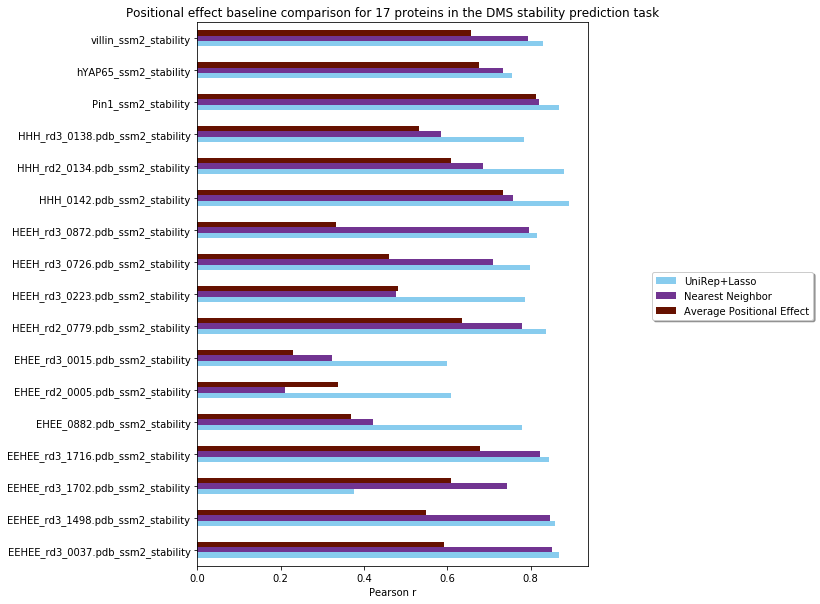

In [56]:
df.loc[['UniRep+Lasso', 'Nearest Neighbor', 'Average Positional Effect']].T.plot(kind='barh', figsize=(7,10), cmap=palette)
plt.legend(loc='upper center', bbox_to_anchor=(1.37, 0.55), fancybox=True, shadow=True)
plt.xlabel('Pearson r')
plt.title('Positional effect baseline comparison for 17 proteins in the DMS stability prediction task')

Text(0.5,1,'KNN top model performance on EEHEE_rd3_1702 de novo design')

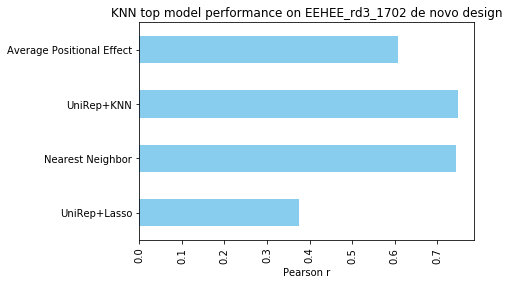

In [57]:
df.loc[['UniRep+Lasso', 'Nearest Neighbor', 'UniRep+KNN', 'Average Positional Effect'],'EEHEE_rd3_1702.pdb_ssm2_stability'].plot(kind='barh', cmap=palette)
plt.xticks(rotation=90)
plt.xlabel("Pearson r")
plt.title("KNN top model performance on EEHEE_rd3_1702 de novo design")